# Analyse de la trajectoire de l'âge de départ dans l'étude d'impact

Le but de cette simulation est d'analyser la trajectoire de l'âge de départ en retraite dans l'étude d'impact. On observe une discontinuité par rapport au COR, que l'on analyse en détail.

In [1]:
from retraites.SimulateurRetraites import SimulateurRetraites
from retraites.EtudeImpact import EtudeImpact
import pylab as pl
from scipy import interpolate
import numpy as np

In [2]:
simulateur = SimulateurRetraites()

In [3]:
etudeImpact = EtudeImpact(simulateur)
analyse_etudeImpact = etudeImpact.calcule()

In [4]:
analyse_COR = simulateur.pilotageCOR()

In [5]:
scenario_central = simulateur.scenario_central # Scénario central : Hausse = +1.3% PIB
scenarios = [scenario_central] # Scénario central : Hausse = +1.3% PIB

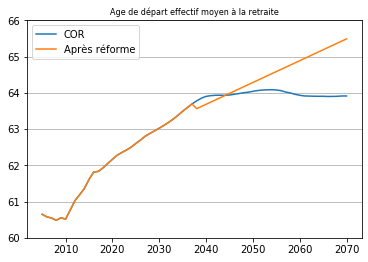

In [6]:
analyse_COR = simulateur.pilotageCOR()
analyse_COR.graphique("A", dessine_legende= False, scenarios_indices = scenarios)
analyse_etudeImpact.graphique("A", dessine_legende= False, scenarios_indices = scenarios)
pl.legend(["COR","Après réforme"])
pl.grid(axis="y")
pl.ylim(top = 66.0)
pl.savefig("../Article4/Simulation-Age-vs-COR.pdf")

On observe une discontinuité en 2038.

In [7]:
for a in range(etudeImpact.age_annee_transition - 1, etudeImpact.age_annee_transition + 2):
    print(a)
    print("  COR % .2f" % (analyse_COR.A[scenario_central][a]))
    print("  EI% .2f" % (analyse_etudeImpact.A[scenario_central][a]))

2037
  COR  63.69
  EI 63.69
2038
  COR  63.78
  EI 63.56
2039
  COR  63.85
  EI 63.62


On observe que l'âge est identique jusqu'en 2037. Puis en 2038 on obtient 63.78 pour le COR et 63.56 dans l'étude d'impact.

L'année de transition 2038 correspond à une année entre les génération 1974 et 1975. 

In [8]:
a = etudeImpact.age_annee_transition 
a

2038

In [9]:
a - analyse_etudeImpact.A[scenario_central][a]

1974.436090225564

## Calcul de l'âge en 2038 qui assure la continuité

On recherche l'âge de départ en 2038 qui rendrait continue la courbe de l'âge.

In [10]:
def residualFunction(age_premiere_generation):
    etudeImpact.age_premiere_generation = age_premiere_generation
    diffAge = etudeImpact.ageDepartParAnnee(2038) - analyse_COR.A[scenario_central][2038]
    return diffAge

In [11]:
residualFunction(63.3)

-0.5006447570780708

In [12]:
residualFunction(64.5)

0.6796888028716026

In [13]:
import scipy.optimize as sco

In [14]:
sco.toms748(residualFunction, 63.3, 64.5)

63.82240607408808

Ainsi un âge de départ à la retraite égal à 63.8 ans en 2038 rendrait continue la trajectoire d'âge.

## Conclusion

La trajectoire de l'âge de départ en retraite est discontinue car l'âge prévu par le COR en 2038 n'est pas égal à celui que nous avons inféré depuis le graphique 73. Dans l'étude d'impact, nous avons utilisé un âge de départ à la retraite égal à 63.6 alors qu'un âge permettant d'assurer la continuité serait égal à 63.8. 

Nous avons calculé l'âge de départ en retraite moyen pour l'ensemble des retraités partant en retraite en 2038 en fonction seulement de l'âge de départ en retraite de la génération 1975. Notre calcul n'est donc qu'une approximation, puisque les personnes partant en retraite en 2038 ne sont pas toutes de la génération 1975. L'étude d'impact ne donnant pas d'information sur l'âge moyen de départ en retraite en 2038, il ne semble pas facile de faire un calcul plus précis. 